In [ ]:
import seaborn as sns
import torch
torch.set_printoptions(sci_mode=False)
import urllib.request
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [ ]:
url = "https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt"
data = urllib.request.urlopen(url)
csv_bytes = data.read()
csv_string = csv_bytes.decode("utf8")
csv_data = io.StringIO(csv_string)
df = pd.read_csv(csv_data)


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7



# Part 1


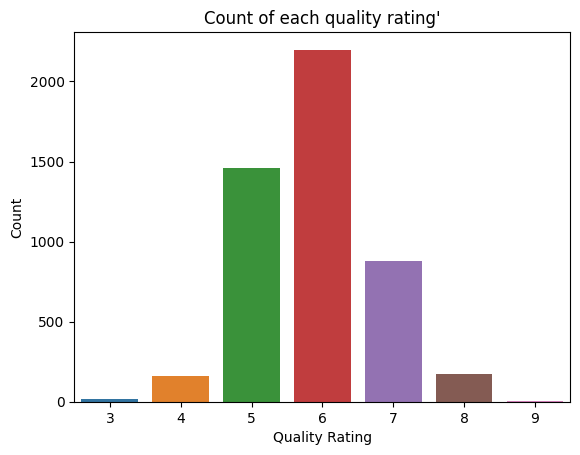

In [ ]:
sns.countplot(data=df, x='quality')


plt.title("Count of each quality rating'")
plt.xlabel("Quality Rating")
plt.ylabel("Count")

# Show the plot
plt.show()

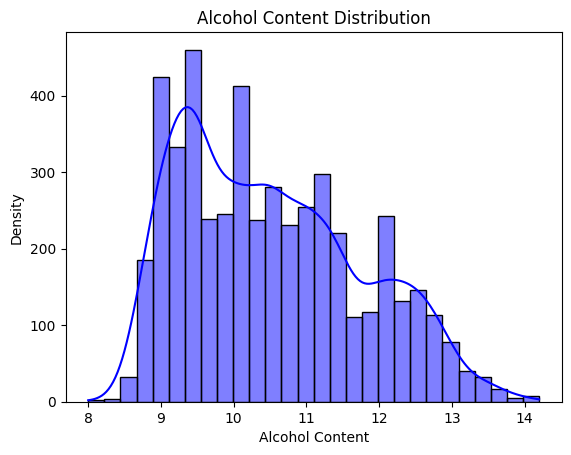

In [ ]:
sns.histplot(data=df, x='alcohol', kde=True, color='blue')
plt.title("Alcohol Content Distribution")
plt.xlabel("Alcohol Content")
plt.ylabel("Density")
plt.show()

Text(0, 0.5, 'Density')

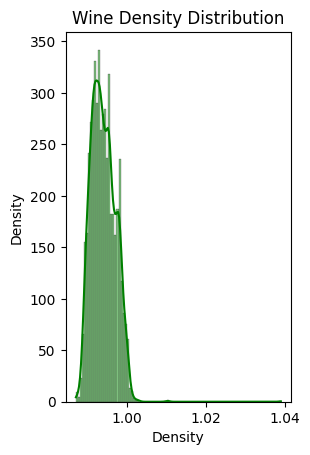

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='density', kde=True, color='green')
plt.title("Wine Density Distribution")
plt.xlabel("Density")
plt.ylabel("Density")

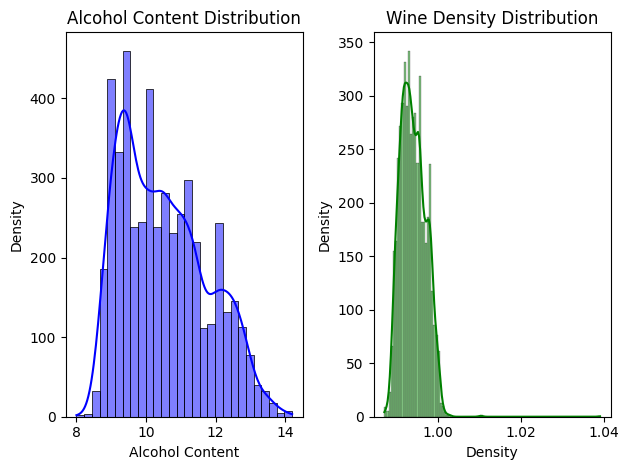

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='alcohol', kde=True, color='blue')
plt.title("Alcohol Content Distribution")
plt.xlabel("Alcohol Content")
plt.ylabel("Density")


plt.subplot(1, 2, 2)
sns.histplot(data=df, x='density', kde=True, color='green')
plt.title("Wine Density Distribution")
plt.xlabel("Density")
plt.ylabel("Density")


plt.tight_layout()

# Show the plots
plt.show()

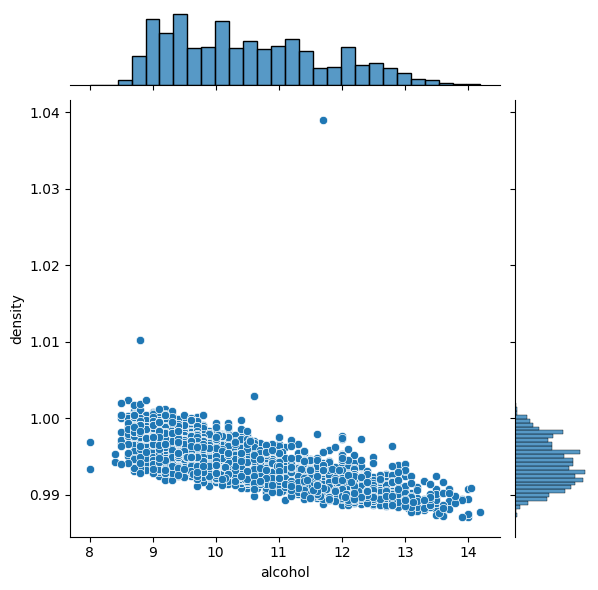

In [ ]:
import seaborn as sns
sns.jointplot(data= df, x='alcohol', y='density', kind='scatter')


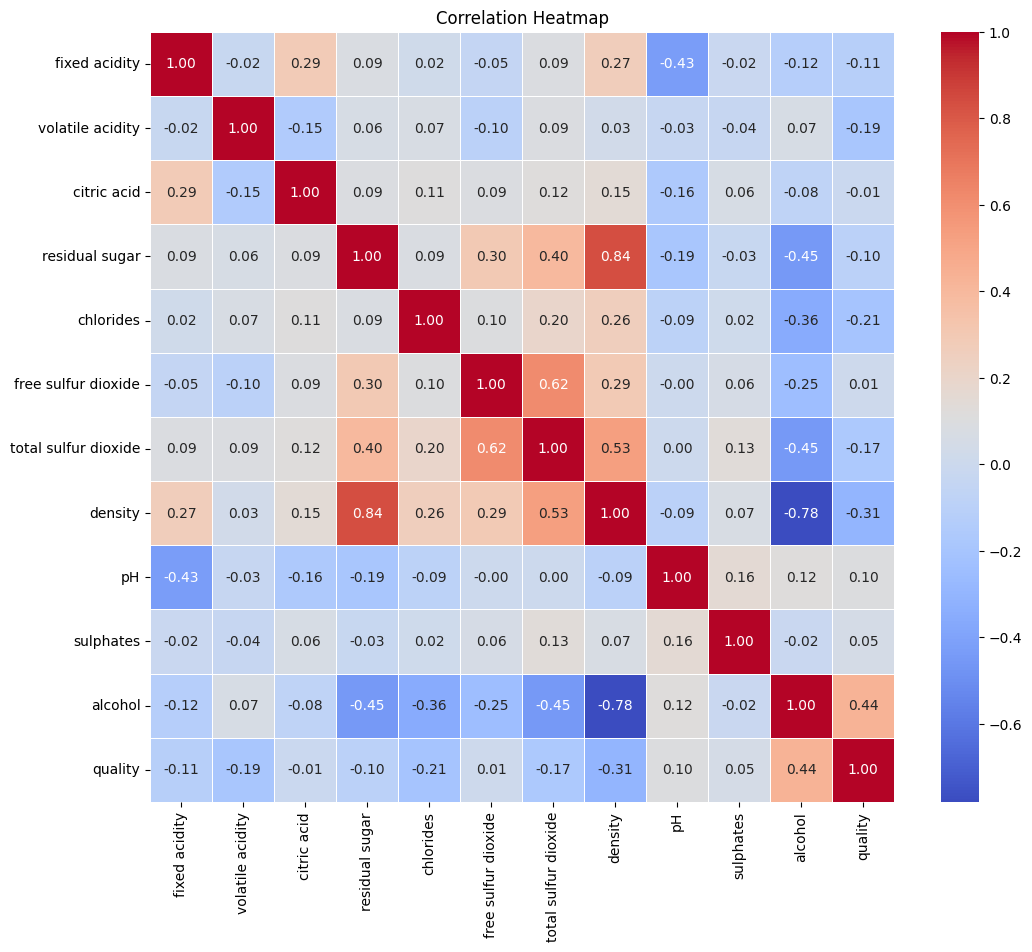

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **PART 2 **

In [ ]:
x = None
y = None
x_mean = None
x_norm = None
y_mean = None
y_norm = None


In [ ]:
def linVar():
  global x, y, x_mean, x_norm, y_mean, y_norm
  x = df['alcohol'].values
  y = df['quality'].values

  x = torch.tensor(x, dtype=torch.float64)
  y = torch.tensor(y, dtype=torch.float64)

  #Normalizing
  x_mean = x.mean(dim=0)
  x_norm = (x-x_mean)/x_mean
  y_mean = y.mean(dim=0)
  y_norm = (y-y_mean)/y_mean

In [ ]:
linVar()

In [ ]:

from torch import nn

def gradDec(model, n_params, x, y, lr=0.01, n_epochs=2000, print_rate=200):
    params = 0.5 * torch.rand(n_params).float()
    params.requires_grad = True
    lossfun = nn.MSELoss()
    for epoch in range(n_epochs):
          y_pred = model(params, x)
          loss = lossfun(y_pred, y)
          loss.backward()
          with torch.no_grad():
              params -= lr * params.grad
              params.grad.zero_()
          if epoch % print_rate == 0:
              print("epoch:", epoch, "loss=", loss.item())
    return params


In [ ]:
def linearModel(params, inputs):
    y_pred = params[0] * inputs + params[1]
    return y_pred

In [ ]:
linear_params = gradDec(linearModel, 2, x_norm, y_norm, lr = 0.001)

print("Trained Parameters: ", linear_params)

epoch: 0 loss= 0.04566200429838504
epoch: 200 loss= 0.03165074448980653
epoch: 400 loss= 0.025349049569890002
epoch: 600 loss= 0.022508835088328027
epoch: 800 loss= 0.02122283390114127
epoch: 1000 loss= 0.02063474981653961
epoch: 1200 loss= 0.020360123507688076
epoch: 1400 loss= 0.020226345138402695
epoch: 1600 loss= 0.020155918799484654
epoch: 1800 loss= 0.020114046478083916
Trained Parameters:  tensor([0.2099, 0.0029], requires_grad=True)


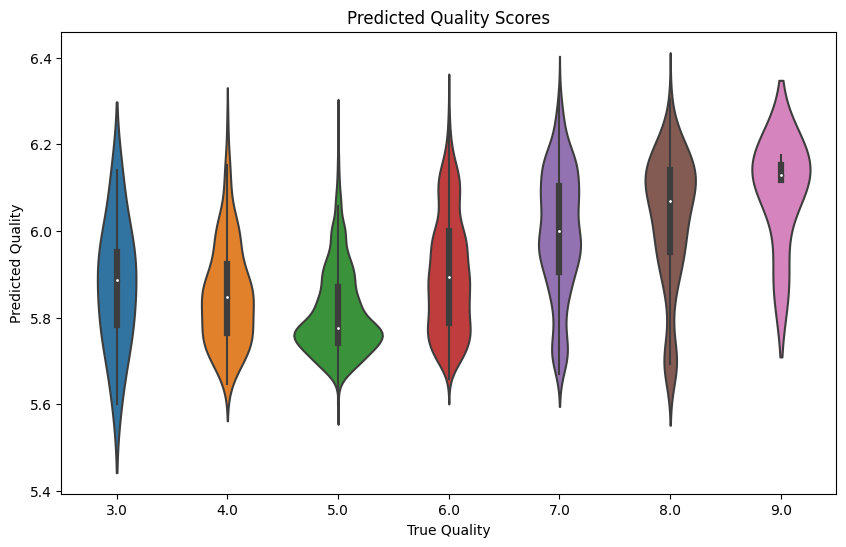

In [ ]:
y_pred_norm = linearModel(linear_params, x_norm)
y_pred_norm = (y_pred_norm * y_mean) + y_mean



plt.figure(figsize=(10,6))

plt.title("Predicted Quality Scores")

sns.violinplot(x= y.detach().numpy(), y=y_pred_norm.detach().numpy())

plt.xlabel("True Quality")

plt.ylabel('Predicted Quality')

plt.show()

In [ ]:
y_pred_norm

tensor([5.3606, 5.6137, 5.7726,  ..., 5.5163, 6.6352, 6.3282],
       grad_fn=<AddBackward0>)

In [ ]:

m = linear_params[0].item()
c = linear_params[1].item()


x_mean = x.mean().item()
y_mean = y.mean().item()


equation = f"y = {m:.4f} (x - {x_mean:.4f}) + {y_mean:.4f} + {c:.4f}"
print(equation)


y = 0.2099 (x - 10.5143) + 5.8779 + 0.0029


# **Multilinear model**

In [ ]:
def multiLinearModel(params, inputs):
  y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] + params[3]*inputs[:,3] + params[4]
  return y_pred

In [ ]:
def multivar():
  global x, y, x_mean, x_norm, y_mean, y_norm
  x = df[['alcohol', 'density', 'pH', 'chlorides']]
  y = df['quality']


  x = torch.Tensor(x.values)
  y = torch.Tensor(y.values)

  x_mean = x.mean(dim=0)
  x_mean
  x_norm = (x-x_mean)/x_mean
  y_mean = y.mean(dim=0)
  y_norm = (y-y_mean)/y_mean

In [ ]:
multivar()

In [ ]:
trained_params = gradDec(multiLinearModel, 5, x_norm, y_norm, 0.05)
print("Trained Parameters: ", trained_params)

epoch: 0 loss= 0.08246368169784546
epoch: 200 loss= 0.018443487584590912
epoch: 400 loss= 0.018417345359921455
epoch: 600 loss= 0.01840035803616047
epoch: 800 loss= 0.018386537209153175
epoch: 1000 loss= 0.018374955281615257
epoch: 1200 loss= 0.01836501993238926
epoch: 1400 loss= 0.018356340005993843
epoch: 1600 loss= 0.01834864914417267
epoch: 1800 loss= 0.01834176853299141
Trained Parameters:  tensor([     0.5151,      0.1287,      0.3129,     -0.0182,      0.0000],
       requires_grad=True)


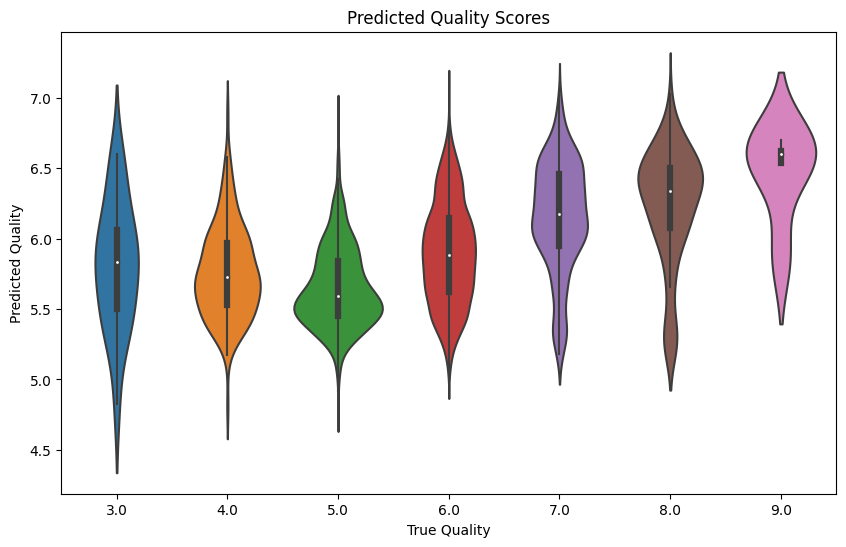

In [ ]:
y_pred_norm = multiLinearModel(trained_params, x_norm)
y_pred_norm = (y_pred_norm * y_mean) + y_mean



plt.figure(figsize=(10,6))

plt.title("Predicted Quality Scores")

sns.violinplot(x= y.detach().numpy(), y=y_pred_norm.detach().numpy())

plt.xlabel("True Quality")

plt.ylabel('Predicted Quality')

plt.show()

In [ ]:

weights = [0.4901, 0.0027, 0.2707, -0.0207]
bias = 0.0000
features = ['alcohol', 'density', 'pH', 'chlorides']


x_means = x_mean.tolist()
y_mean_val = y_mean.item()

equation_parts = [f"{weights[i]:.4f} ({features[i]} - {x_means[i]:.4f})" for i in range(4)]
equation = f"quality = {' + '.join(equation_parts)} + {y_mean_val:.4f} + {bias:.4f}"

print(equation)


quality = 0.4901 (alcohol - 10.5143) + 0.0027 (density - 0.9940) + 0.2707 (pH - 3.1883) + -0.0207 (chlorides - 0.0458) + 5.8779 + 0.0000


# **` Model With interaction`**


In [ ]:
def multiLinearModel_withInteraction(params, inputs):
  y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] +  params[2]*inputs[:,2] +  params[3]*inputs[:,3] + params[4]*(inputs[:,0]*inputs[:,2]) + params[5]*(inputs[:,1]*inputs[:,3]) + params[6]
  return y_pred

In [ ]:
interaction_params = gradDec(multiLinearModel_withInteraction,7,x_norm,y_norm,0.01,2000)
print("Trained Parameters: ", interaction_params)

epoch: 0 loss= 0.07277490943670273
epoch: 200 loss= 0.02690848894417286
epoch: 400 loss= 0.019634593278169632
epoch: 600 loss= 0.018479734659194946
epoch: 800 loss= 0.018295196816325188
epoch: 1000 loss= 0.01826462894678116
epoch: 1200 loss= 0.018258586525917053
epoch: 1400 loss= 0.0182565376162529
epoch: 1600 loss= 0.018255213275551796
epoch: 1800 loss= 0.01825408637523651
Trained Parameters:  tensor([     0.5044,      0.3791,      0.1695,     -0.0212,      0.1529,
             0.2829,     -0.0002], requires_grad=True)


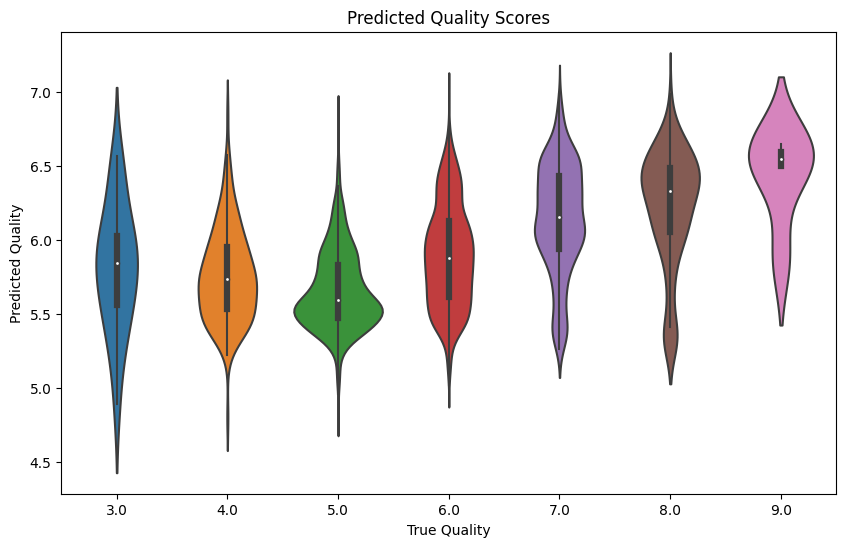

In [ ]:
y_pred_norm = multiLinearModel_withInteraction(interaction_params, x_norm)
y_pred_norm = (y_pred_norm * y_mean) + y_mean



plt.figure(figsize=(10,6))

plt.title("Predicted Quality Scores")

sns.violinplot(x= y.detach().numpy(), y=y_pred_norm.detach().numpy())

plt.xlabel("True Quality")

plt.ylabel('Predicted Quality')

plt.show()

In [ ]:
def threshold_accuracy(model, params, x, y, T):
    correct_predictions = 0
    total_predictions = len(x)

    for i in range(total_predictions):
        if len(x.shape) == 1:  # if x is 1D
            y_pred = model(params, x[i].unsqueeze(0))
        else:  # if x is 2D
            y_pred = model(params, x[i,:].unsqueeze(0))

        diff = torch.abs(y_pred - y[i])
        if torch.all(diff <= T):
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy



In [ ]:

def print_threshold_accuracy(model, params):
  t_values = [0.25,0.5,1]
  for t in t_values:
    print(threshold_accuracy(model, params, x_norm, y_norm,t))

In [ ]:
multivar()
print("multiLinear")
print_threshold_accuracy(multiLinearModel, trained_params)

print("\ninteraction")
print_threshold_accuracy(multiLinearModel_withInteraction, interaction_params)

multiLinear
0.9197631686402613
0.9981625153123724
1.0

interaction
0.9209881584320131
0.9979583503470805
1.0


In [ ]:
linVar()

print("linear")
print_threshold_accuracy(linearModel, linear_params)

linear
0.92588811759902
0.9981625153123724
1.0


In [ ]:
def k_fold_split(X, y, k=5):
    n = len(y)
    fold_size = int(n/k)

    # Randomly shuffle indices
    p = np.random.permutation(n)
    X_shuffled = X[p]
    y_shuffled = y[p]

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        X_val = X_shuffled[start:end]
        y_val = y_shuffled[start:end]

        X_train = np.concatenate((X_shuffled[:start], X_shuffled[end:]))
        y_train = np.concatenate((y_shuffled[:start], y_shuffled[end:]))

        yield X_train, X_val, y_train, y_val

In [ ]:
from scipy.stats import ttest_rel #
multivar()

k = 5
t_values = [0.25, 0.5, 1]

model_accuracies = {}

for model_name, model_func, model_params in [('multiLinearModel', multiLinearModel, trained_params),
                                             ('interaction', multiLinearModel_withInteraction, interaction_params)]:

    model_accuracies[model_name] = {t: [] for t in t_values}

    for X_train, X_val, y_train, y_val in k_fold_split(x_norm, y_norm, k=k):

        for t in t_values:
            acc = threshold_accuracy(model_func, model_params, X_val, y_val, t)
            model_accuracies[model_name][t].append(acc)


for model_name, accuracies in model_accuracies.items():
    for t in t_values:
        model_accuracies[model_name][t] = np.mean(accuracies[t])

print(model_accuracies)


{'multiLinearModel': {0.25: 0.9197139938712973, 0.5: 0.9981613891726251, 1: 1.0}, 'interaction': {0.25: 0.9209397344228805, 0.5: 0.9979570990806945, 1: 1.0}}


In [ ]:


multivar()

k = 5
t_values = [0.25, 0.5, 1]

model_accuracies = {}

for model_name, model_func, model_params in [('multiLinearModel', multiLinearModel, trained_params),
                                             ('interaction', multiLinearModel_withInteraction, interaction_params)]:

    model_accuracies[model_name] = {t: [] for t in t_values}

    for X_train, X_val, y_train, y_val in k_fold_split(x_norm, y_norm, k=k):
        for t in t_values:
            acc = threshold_accuracy(model_func, model_params, X_val, y_val, t)
            model_accuracies[model_name][t].append(acc)


model_means = {}
model_std_devs = {}

for model_name, accuracies in model_accuracies.items():
    model_means[model_name] = {}
    model_std_devs[model_name] = {}
    for t in t_values:
        model_means[model_name][t] = np.mean(accuracies[t])
        model_std_devs[model_name][t] = np.std(accuracies[t])

print("Mean Accuracies:", model_means)
print("Standard Deviations:", model_std_devs)


for t in t_values:
    t_stat, p_val = ttest_rel(model_accuracies['multiLinearModel'][t], model_accuracies['interaction'][t])
    print(f"Paired t-test for threshold {t}: t-statistic = {t_stat}, p-value = {p_val}")


Mean Accuracies: {'multiLinearModel': {0.25: 0.9199182839632278, 0.5: 0.9981613891726251, 1: 1.0}, 'interaction': {0.25: 0.9209397344228805, 0.5: 0.9979570990806945, 1: 1.0}}
Standard Deviations: {'multiLinearModel': {0.25: 0.0045036583626248275, 0.5: 0.0013551071666416342, 1: 0.0}, 'interaction': {0.25: 0.0015287670630332443, 0.5: 0.0009136130653727233, 1: 0.0}}
Paired t-test for threshold 0.25: t-statistic = -0.3651483716701092, p-value = 0.7334889066699479
Paired t-test for threshold 0.5: t-statistic = 0.2721655269759251, p-value = 0.7989658591927669
Paired t-test for threshold 1: t-statistic = nan, p-value = nan


In [ ]:


linVar()

k = 5
t_values = [0.25, 0.5, 1]

model_accuracies = {}

for model_name, model_func, model_params in [('linearModel', linearModel, linear_params)]:

    model_accuracies[model_name] = {t: [] for t in t_values}

    for X_train, X_val, y_train, y_val in k_fold_split(x_norm, y_norm, k=k):

        for t in t_values:
            acc = threshold_accuracy(model_func, model_params, X_val, y_val, t)
            model_accuracies[model_name][t].append(acc)


model_means = {}
model_std_devs = {}

for model_name, accuracies in model_accuracies.items():
    model_means[model_name] = {}
    model_std_devs[model_name] = {}
    for t in t_values:
        model_means[model_name][t] = np.mean(accuracies[t])
        model_std_devs[model_name][t] = np.std(accuracies[t])

print("Mean Accuracies:", model_means)
print("Standard Deviations:", model_std_devs)


Mean Accuracies: {'linearModel': {0.25: 0.9258426966292135, 0.5: 0.9981613891726251, 1: 1.0}}
Standard Deviations: {'linearModel': {0.25: 0.0033318705679877807, 0.5: 0.0015012194542082776, 1: 0.0}}
